In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mammographic_masses.csv', names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'])

In [3]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [4]:
df = df.replace('\?', np.nan, regex=True)
df = df.astype(np.float64)
df = df.fillna(df.mean())

In [5]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.000000,1.0
1,4.0,43.0,1.0,1.0,2.910734,1.0
2,5.0,58.0,4.0,5.0,3.000000,1.0
3,4.0,28.0,1.0,1.0,3.000000,0.0
4,5.0,74.0,1.0,5.0,2.910734,1.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [7]:
X = df.loc[:, df.columns != "Severity"]
y = df.Severity

In [1]:
def test_naive_bayes(train_batch_size: float):
    train_batch_size = train_batch_size
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_batch_size, random_state=0, stratify=y)
    
    gnb = GaussianNB()
    preds = gnb.fit(X_train, y_train).predict(X_test)
    
    print('Train size: ', train_batch_size)
    print('Accuracy: ', accuracy_score(y_test, preds))
    print('Precision: ', precision_score(y_test, preds))
    print('Recall: ', recall_score(y_test, preds))
    print('F1 Score: ', f1_score(y_test, preds))
    print('\nClassification report:\n', classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds, labels=gnb.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

    disp.plot()
    plt.show()

In [2]:
train_batch_sizes = [0.6, 0.7, 0.8, 0.9]

Train size:  0.6
Accuracy:  0.8519480519480519
Precision:  0.7951219512195122
Recall:  0.9157303370786517
F1 Score:  0.8511749347258486

Classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.80      0.85       207
         1.0       0.80      0.92      0.85       178

    accuracy                           0.85       385
   macro avg       0.86      0.86      0.85       385
weighted avg       0.86      0.85      0.85       385



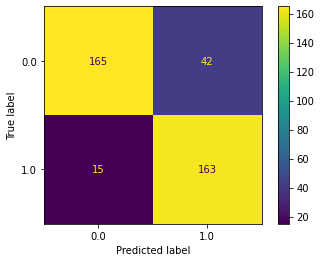

Train size:  0.7
Accuracy:  0.8650519031141869
Precision:  0.8145695364238411
Recall:  0.917910447761194
F1 Score:  0.8631578947368421

Classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       155
         1.0       0.81      0.92      0.86       134

    accuracy                           0.87       289
   macro avg       0.87      0.87      0.87       289
weighted avg       0.87      0.87      0.87       289



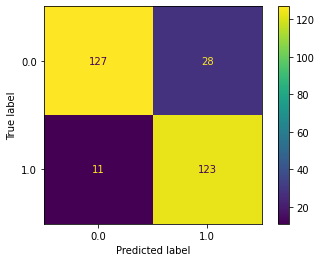

Train size:  0.8
Accuracy:  0.8393782383419689
Precision:  0.8085106382978723
Recall:  0.8539325842696629
F1 Score:  0.8306010928961749

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       104
         1.0       0.81      0.85      0.83        89

    accuracy                           0.84       193
   macro avg       0.84      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193



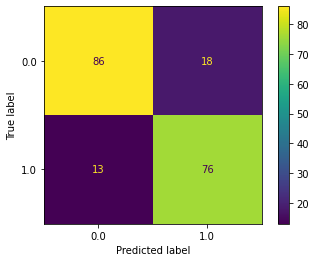

Train size:  0.9
Accuracy:  0.865979381443299
Precision:  0.8636363636363636
Recall:  0.8444444444444444
F1 Score:  0.853932584269663

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88        52
         1.0       0.86      0.84      0.85        45

    accuracy                           0.87        97
   macro avg       0.87      0.86      0.87        97
weighted avg       0.87      0.87      0.87        97



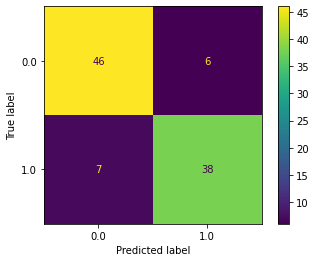

In [10]:
for batch_size in train_batch_sizes:
    test_naive_bayes(batch_size)